In [120]:
import numpy as np
import scipy.stats as sps
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
%matplotlib inline

Пусть имеется набор элементов $Y_i = X^{\top}W + \mathcal{E}_i$, $\mathcal{E}_i$ - гомоскедастичные случайные ошибки.

Количество признаков: $m = 100$.

Размер набора: $n = 1000$.

In [121]:
n = 1000
m = 100

X = sps.uniform(loc=0, scale=10).rvs(size=(n, m))
W_true = sps.uniform(loc=-10, scale=20).rvs(size=m)
E = sps.norm().rvs(size=n)
Y = X @ W_true.T + E

##### Цель:   
Научиться предсказывать значение $W$ по значениям $X$ и $Y$. 

Рассмотреть, как ведет себя предсказание при последовательном увеличении количества признаков.

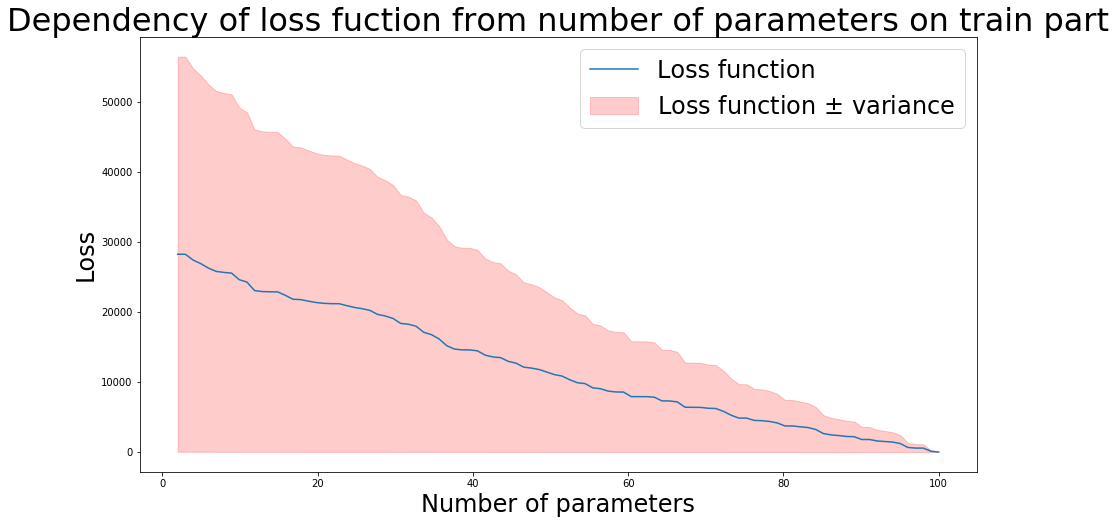

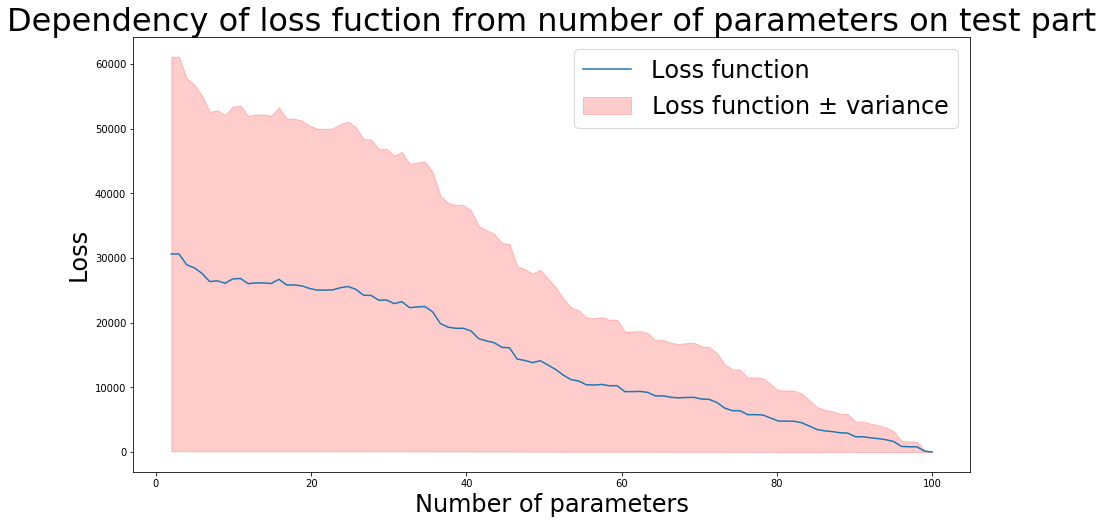

In [123]:
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, 
                                                                    random_state=42)

Y_train = Y_train.reshape((Y_train.shape[0], 1))
Y_test = Y_test.reshape((Y_test.shape[0], 1))

diff_test = np.zeros(m + 1)
diff_train = np.zeros(m + 1)

var_test = np.zeros(m + 1)
var_train = np.zeros(m + 1)

for i in range(1, m + 1):
    
    cur_X_train = X_train.T[:i].T
    cur_Y_train = Y_train.T[:i].T
    cur_X_test = X_test.T[:i].T
    cur_Y_test = Y_test.T[:i].T
    
    lr = LinearRegression()
    lr.fit(cur_X_train, cur_Y_train)
    
    error_train = np.absolute(lr.predict(cur_X_train) - cur_Y_train)
    error_test = np.absolute(lr.predict(cur_X_test) - cur_Y_test)
    
    diff_train[i] = (error_train ** 2).sum() / (error_train.shape[0])
    diff_test[i] = (error_test ** 2).sum() / (error_test.shape[0])
    
    var_train[i] = (error_train ** 2).sum() / error_train.shape[0] - \
        ((error_train / error_train.shape[0]) ** 2).sum()
    var_test[i] = (error_test ** 2).sum() / error_test.shape[0] - \
        ((error_test / error_test.shape[0]) ** 2).sum()

plt.figure(figsize=(15, 8))
plt.title("Dependency of loss fuction from number of parameters on train part", 
          fontsize=32)
plt.plot(np.linspace(2, m, m), diff_train[1:], label="Loss function")
plt.fill_between(np.linspace(2, m, m), diff_train[1:] - var_train[1:], 
                 diff_train[1:] + var_train[1:], color='red', alpha = 0.2, 
                 label='Loss function $\\pm$ variance')
plt.legend(fontsize=24)
plt.xlabel("Number of parameters", fontsize=24)
plt.ylabel("Loss", fontsize=24)
plt.show()

plt.figure(figsize=(15, 8))
plt.title("Dependency of loss fuction from number of parameters on test part", 
          fontsize=32)
plt.plot(np.linspace(2, m, m), diff_test[1:], label="Loss function")
plt.fill_between(np.linspace(2, m, m), diff_test[1:] - var_test[1:], 
                 diff_test[1:] + var_test[1:], color='red', alpha = 0.2, 
                 label='Loss function $\\pm$ variance')
plt.legend(fontsize=24)
plt.xlabel("Number of parameters", fontsize=24)
plt.ylabel("Loss", fontsize=24)
plt.show()

## Вывод:

Как видно из графиков, ошибка на тестовой выборке гораздо больше, чем на обучающей. Вероятно, это связано с малым размером выборки.

Величина функции потерь убывает при росте используемых признаков, как и дисперсия ошибки.